In [1]:
import pandas as pd

file_path = '/Users/apple/Desktop/datasci 507/creditcard.csv'
df = pd.read_csv(file_path)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [4]:
print("Distribuition of Normal(0) and Frauds(1): ")
print(df["Class"].value_counts())

Distribuition of Normal(0) and Frauds(1): 
Class
0    284315
1       492
Name: count, dtype: int64


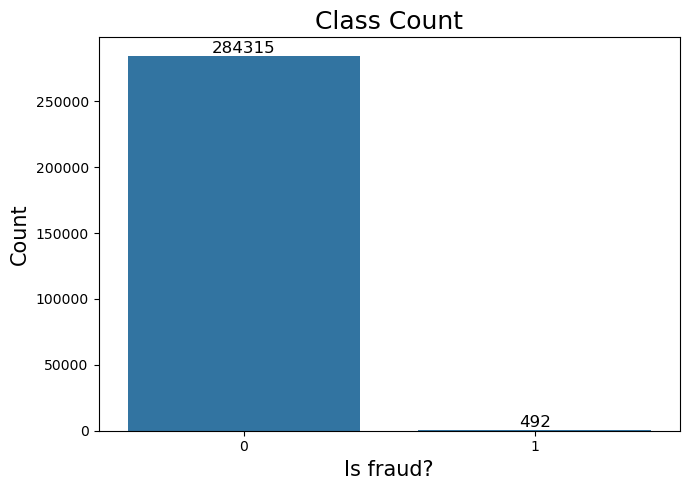

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(7, 5))

#Visualization of category distribution
sns.countplot(x='Class', data=df, ax=ax)

ax.set_title("Class Count", fontsize=18)
ax.set_xlabel("Is fraud?", fontsize=15)
ax.set_ylabel("Count", fontsize=15)

# Add specific values
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',                
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom',   
                fontsize=12, color='black') 

plt.tight_layout()
plt.show()

/var/folders/m_/fn9fr8q51pzf2ffj6fb6f5k40000gn/T/ipykernel_56104/1450044119.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 0]["Time_hour"],
/var/folders/m_/fn9fr8q51pzf2ffj6fb6f5k40000gn/T/ipykernel_56104/1450044119.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df

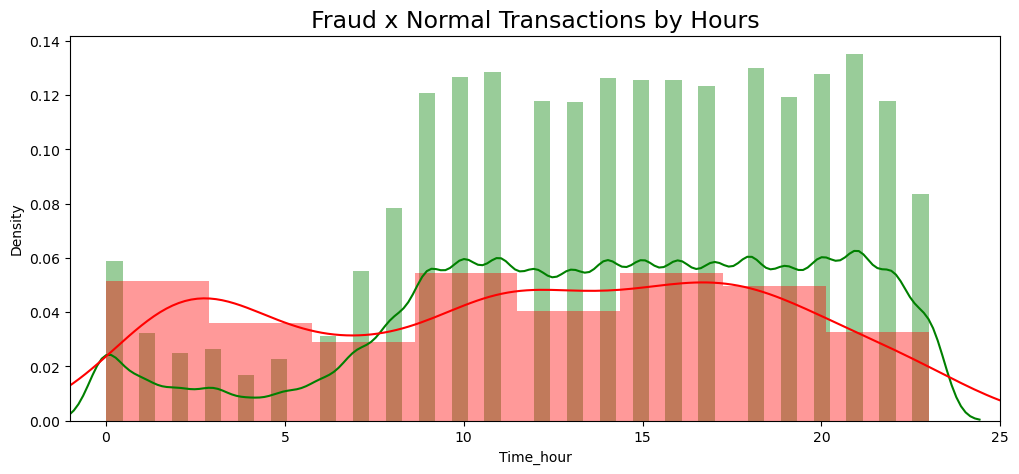

In [6]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)
#Time Distribution
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

/var/folders/m_/fn9fr8q51pzf2ffj6fb6f5k40000gn/T/ipykernel_56104/508400772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 0]["Time_min"],
/var/folders/m_/fn9fr8q51pzf2ffj6fb6f5k40000gn/T/ipykernel_56104/508400772.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['C

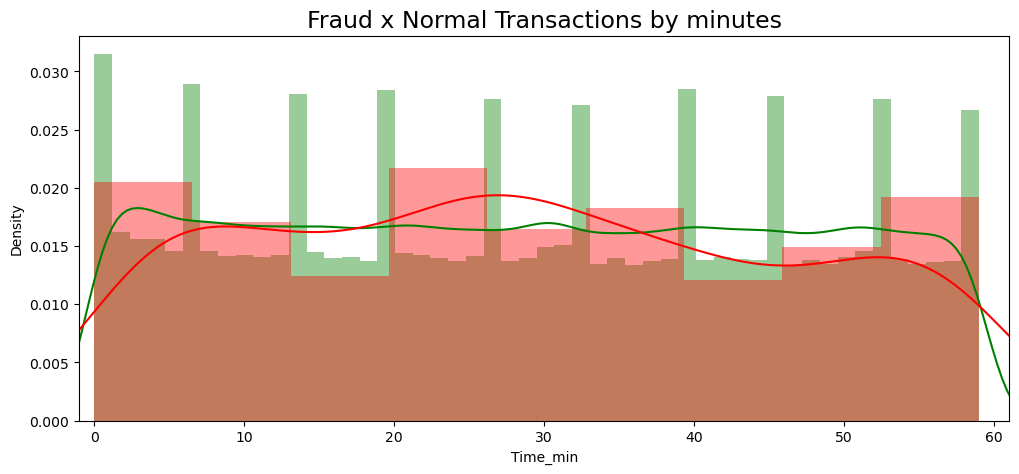

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

In [8]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [9]:
import numpy as np

df['Amount_log'] = np.log(df.Amount + 0.01)

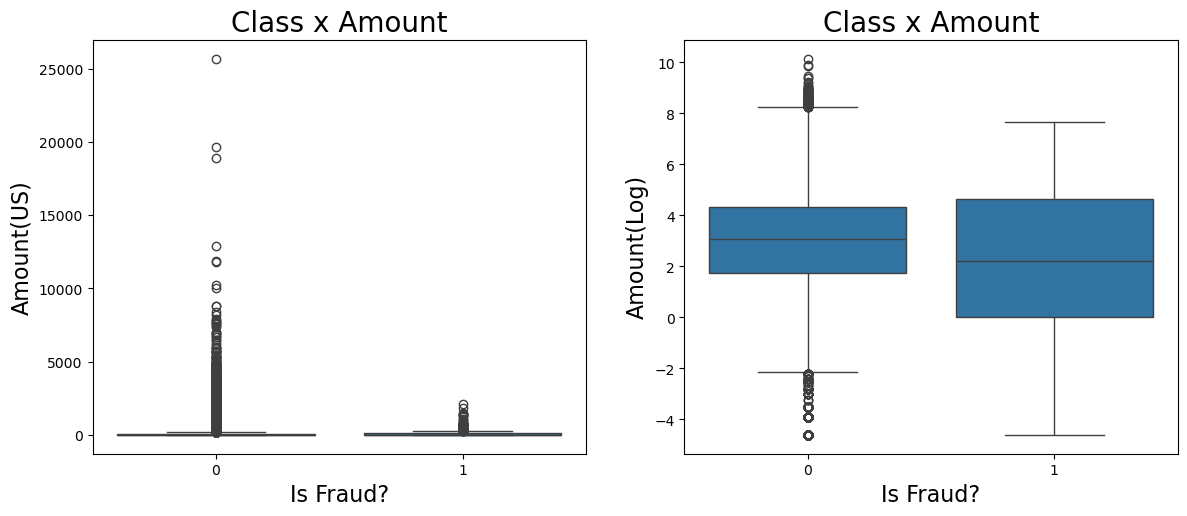

In [10]:
plt.figure(figsize=(14,6))

plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

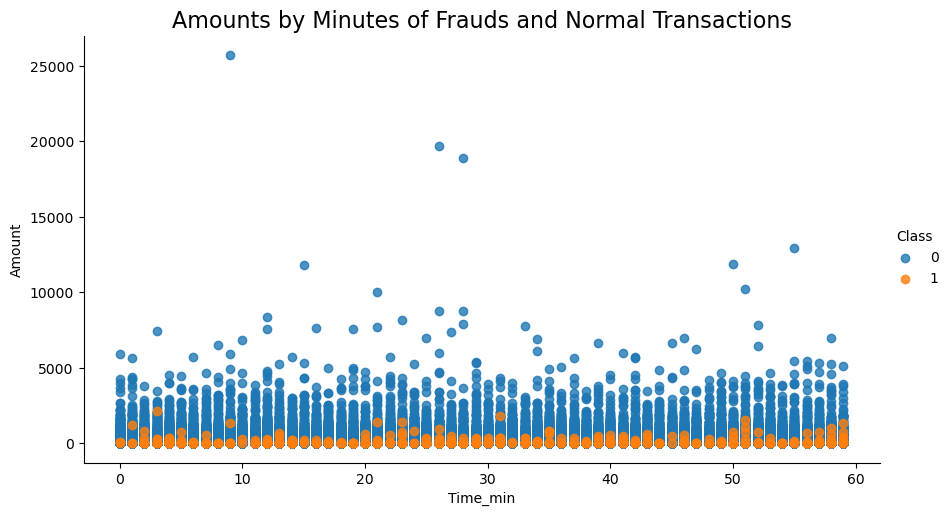

In [11]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

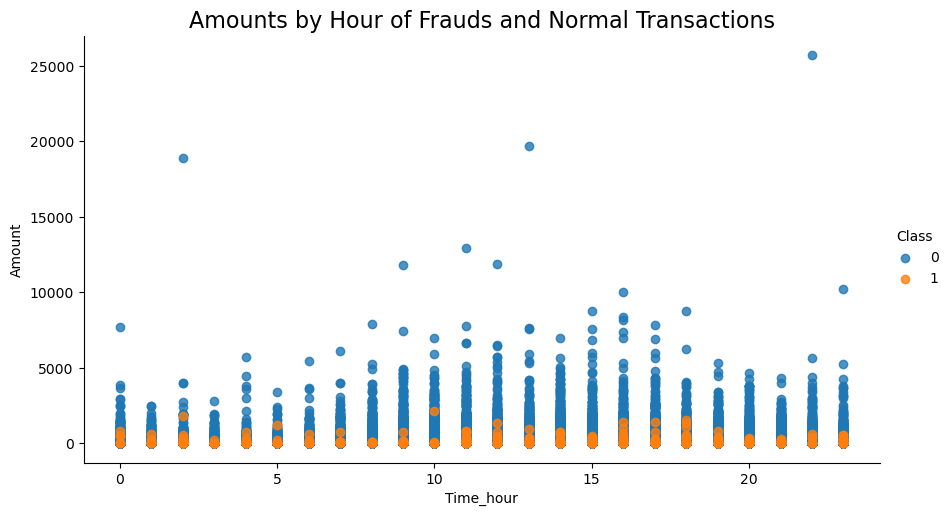

In [12]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

Data Missing Value Check：
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Time_min      0
Time_hour     0
Amount_log    0
dtype: int64


/var/folders/m_/fn9fr8q51pzf2ffj6fb6f5k40000gn/T/ipykernel_56104/1825047702.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')


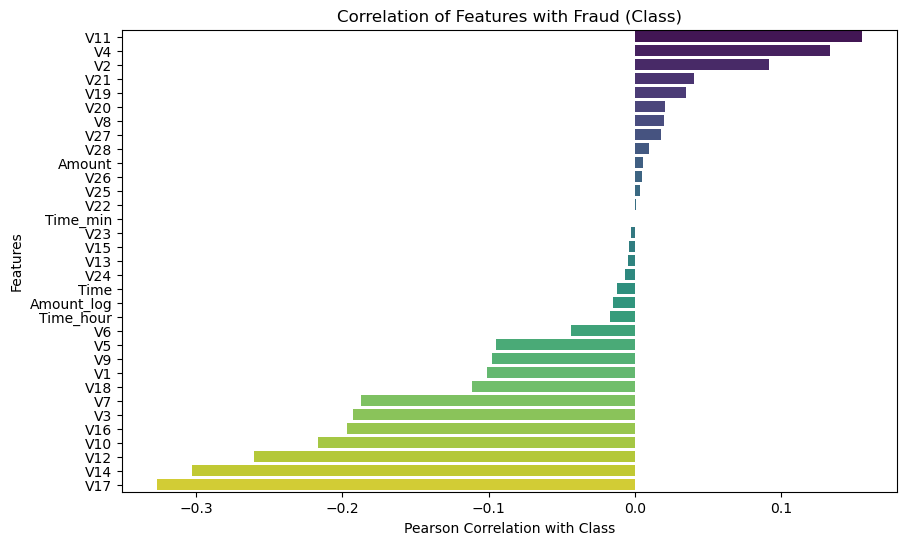

/var/folders/m_/fn9fr8q51pzf2ffj6fb6f5k40000gn/T/ipykernel_56104/1825047702.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="rocket")


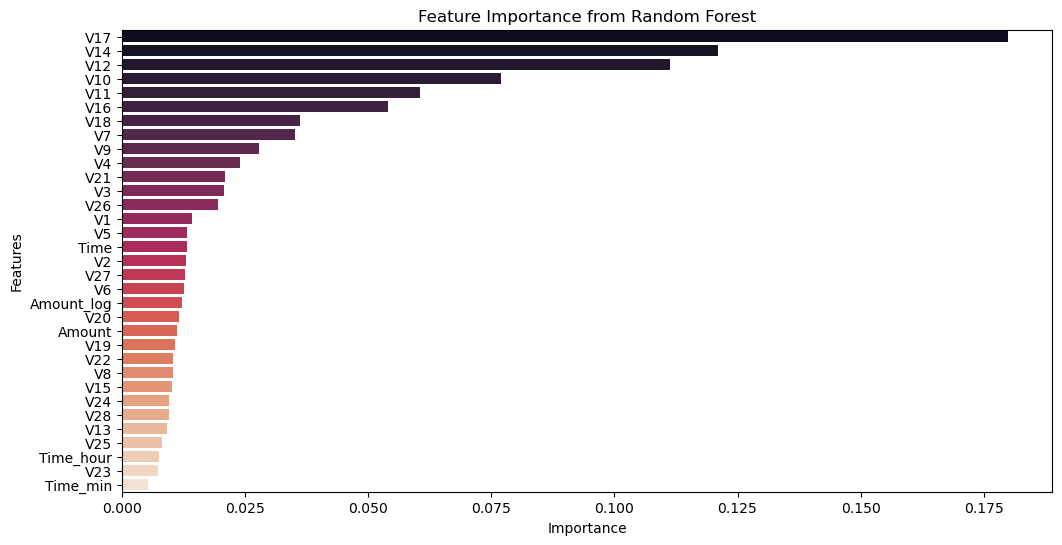

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recursive Feature Elimination (RFE) Selected Features：
Index(['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V27'], dtype='object')
Features to be retained based on correlation analysis and feature importance：
['V11', 'V4', 'V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28', 'Amount']
RFE select features： Index(['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V27'], dtype='object')


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#data preprocessing
print(f"Data Missing Value Check：\n{df.isnull().sum()}")
df = df.dropna()  

#Preliminary Feature Correlation Analysis
corr_matrix = df.corr()  
corr_with_target = corr_matrix["Class"].drop("Class").sort_values(ascending=False)  # 取Class列相关性
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')
plt.title("Correlation of Features with Fraud (Class)")
plt.xlabel("Pearson Correlation with Class")
plt.ylabel("Features")
plt.show()

X = df.drop("Class", axis=1)
y = df["Class"]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Obtain feature importance and visualize
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="rocket")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#RFE
log_model = LogisticRegression(max_iter=1000)
rfe_selector = RFE(log_model, n_features_to_select=10)
rfe_selector.fit(X, y)

# Display selected features
selected_features = X.columns[rfe_selector.support_]
print(f"Recursive Feature Elimination (RFE) Selected Features：\n{selected_features}")

# Intersection of relevance and feature selection results
print("Features to be retained based on correlation analysis and feature importance：")
important_features = corr_with_target.index[:10].tolist() 
print(important_features)

# Compare these characteristics with the selection of RFEs
print("RFE select features：", selected_features)

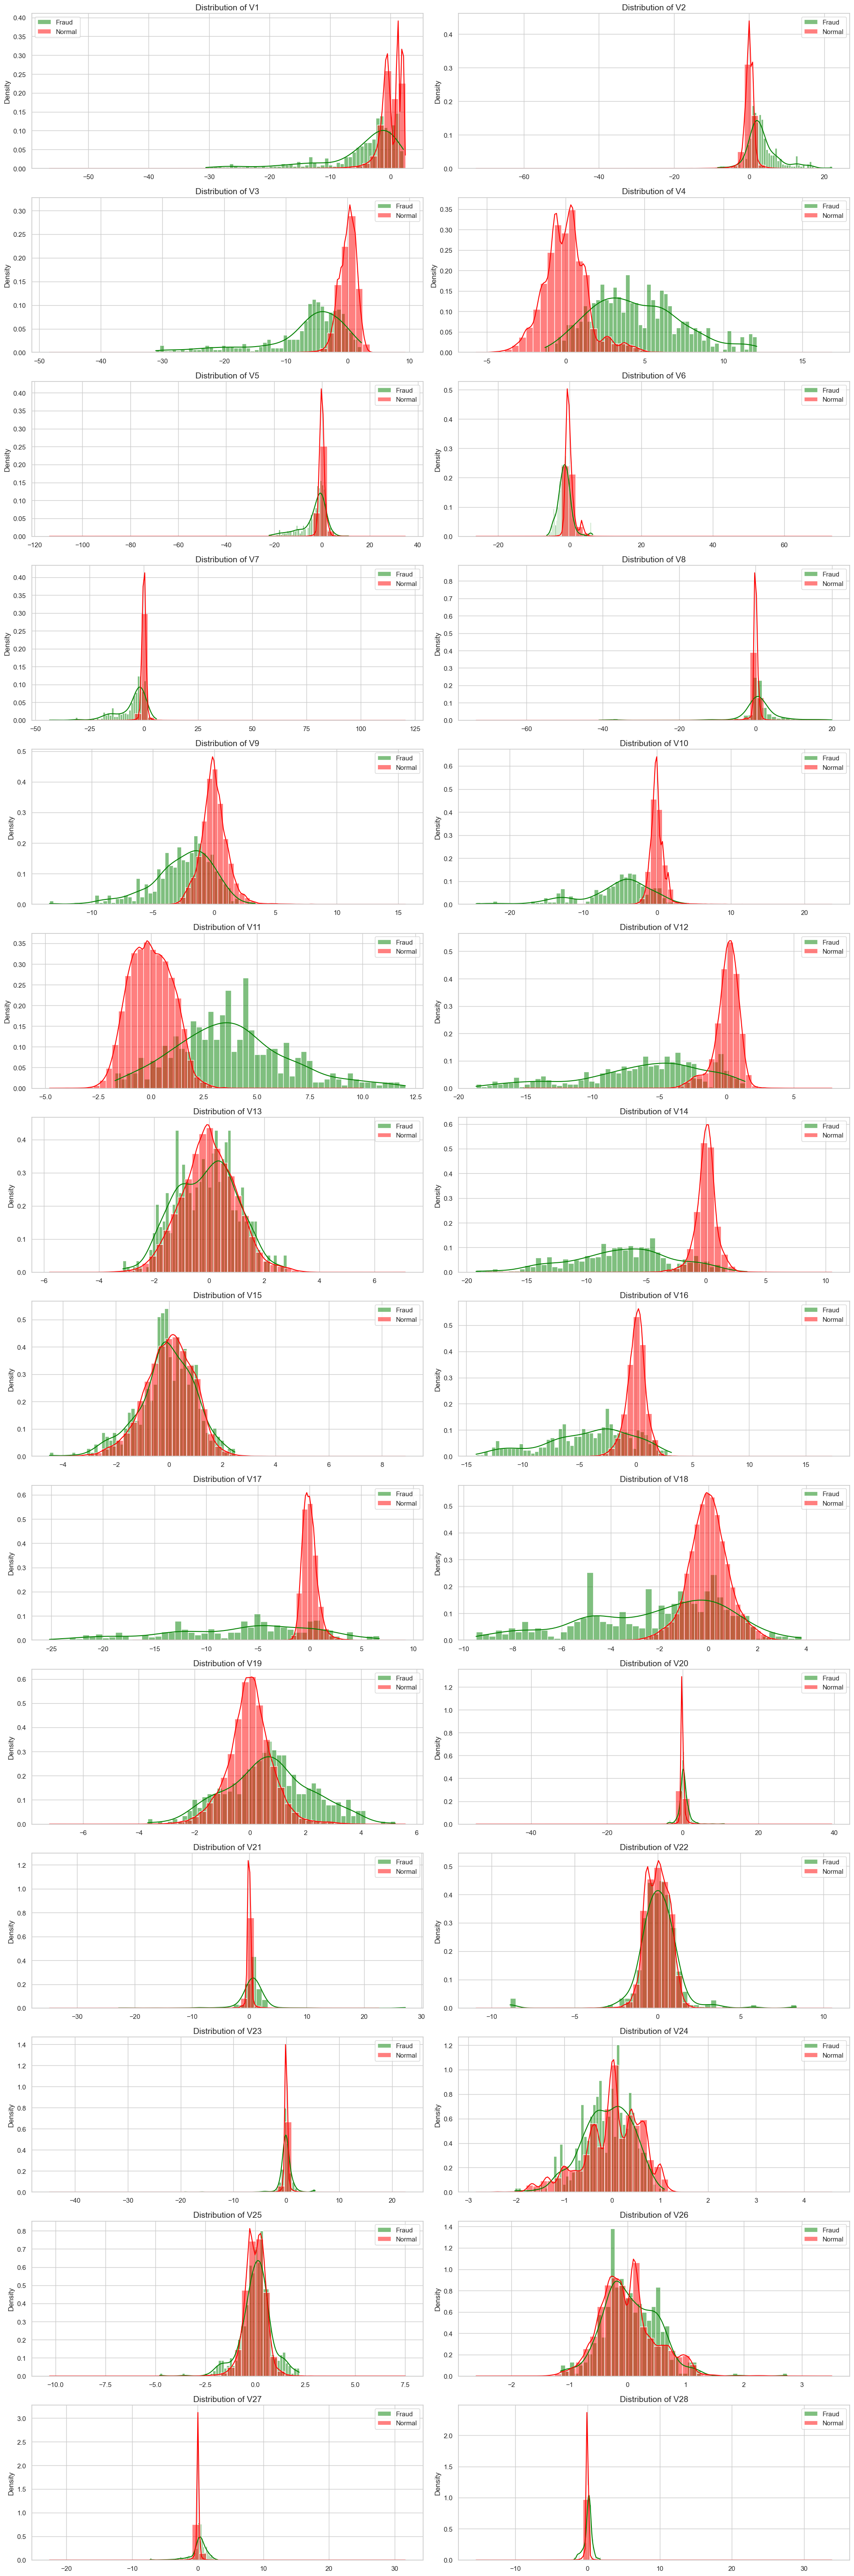

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

sns.set(style="whitegrid")

columns = df.iloc[:, 1:29].columns

# Screening Fraudulent and Legitimate Transactions
frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20, 60))  

for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    sns.histplot(df[col][frauds], bins=50, color='green', kde=True, label='Fraud', stat='density')
    sns.histplot(df[col][normals], bins=50, color='red', kde=True, label='Normal', stat='density')
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('')
    ax.legend()

plt.tight_layout()
plt.show()


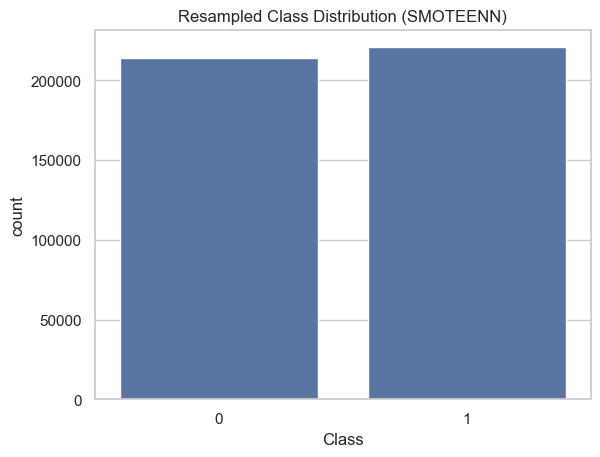

In [15]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Split features and target variables
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-ENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution (SMOTEENN)')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Training a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9798842458339553


In [17]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Split features and target variables
X = df.drop('Class', axis=1)
y = df['Class']


# Create a sliding window sequence
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X.iloc[i:i+window_size].values)
        y_seq.append(y.iloc[i+window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 10
X_train_seq, y_train_seq = create_sequences(pd.DataFrame(X_resampled), y_resampled, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, window_size)

# Standardized Features (LSTM is sensitive to the range of features)
scaler = StandardScaler()
X_train_seq = scaler.fit_transform(X_train_seq.reshape(-1, X_train_seq.shape[-1])).reshape(X_train_seq.shape)
X_test_seq = scaler.transform(X_test_seq.reshape(-1, X_test_seq.shape[-1])).reshape(X_test_seq.shape)

# Build LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(window_size, X_train_seq.shape[2]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

# Evaluation Model
y_pred_prob = model.predict(X_test_seq)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test_seq, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_seq, y_pred_prob))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9994 - loss: 0.0091 - val_accuracy: 0.9971 - val_loss: 0.1654
Epoch 2/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9980 - val_loss: 0.0792
Epoch 3/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 1.0000 - loss: 8.1290e-04 - val_accuracy: 0.9943 - val_loss: 5.3146
Epoch 4/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 1.0000 - loss: 9.7612e-04 - val_accuracy: 0.9977 - val_loss: 0.2941
Epoch 5/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.9999 - loss: 0.0041 - val_accuracy: 0.9954 - val_loss: 0.5666
Epoch 6/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9978 - val_loss: 0.0982
Epoch 7/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9967 - val_loss: 1.9825
Epoch 8/20
13574/13574 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - ac

In [19]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, f1_score, recall_score
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler


# Build LightGBM Model
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    metric='auc',
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    random_state=42
)

# Perform 5-fold cross-validation to evaluate the F1 score, recall rate, and ROC-AUC.
f1_scorer = make_scorer(f1_score)
recall_scorer = make_scorer(recall_score)
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

cv_f1_scores = cross_val_score(lgb_model, X_resampled, y_resampled, cv=5, scoring=f1_scorer)
cv_recall_scores = cross_val_score(lgb_model, X_resampled, y_resampled, cv=5, scoring=recall_scorer)
cv_roc_auc_scores = cross_val_score(lgb_model, X_resampled, y_resampled, cv=5, scoring=roc_auc_scorer)

# Output cross-validation results
print("Cross-validated F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean(), "±", cv_f1_scores.std())
print("Cross-validated Recall scores:", cv_recall_scores)
print("Mean Recall score:", cv_recall_scores.mean(), "±", cv_recall_scores.std())
print("Cross-validated ROC-AUC scores:", cv_roc_auc_scores)
print("Mean ROC-AUC score:", cv_roc_auc_scores.mean(), "±", cv_roc_auc_scores.std())

# Train the final model and evaluate it on the test set.
lgb_model.fit(X_resampled, y_resampled)
y_prob = lgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

# Output Test Set Performance
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Cross-validated F1 scores: [0.99818795 0.99849396 0.99831213 0.99801823 0.99838014]
Mean F1 score: 0.9982784824758009 ± 0.00016359778724018024
Cross-validated Recall scores: [0.99839148 0.99884459 0.99827821 0.99830086 0.99836883]
Mean Recall score: 0.9984367920253738 ± 0.00020813201772282194
Cross-validated ROC-AUC scores: [0.9999016  0.99991986 0.99988769 0.99989384 0.99987214]
Mean ROC-AUC score: 0.9998950253622585 ± 1.5741230658056203e-05

Test Set Performance:
              precision    recall  f1-score   support

           0     0.9998    0.9982    0.9990     56864
           1     0.4607    0.8980    0.6090        98

    accuracy                         0.9980     56962
   macro avg     0.7303    0.9481    0.8040     56962
weighted avg     0.9989    0.9980    0.9983     56962

ROC-AUC: 0.9864104688020396


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:23:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:23:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:23:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use

Cross-validated F1 scores: [0.99864115 0.99884506 0.99866347 0.99867478 0.99889005]
Mean F1 score: 0.9987428990297668 ± 0.00010333609842913237
Cross-validated Recall scores: [0.99898052 0.99925238 0.99875396 0.99875396 0.99902583]
Mean Recall score: 0.9989533303126417 ± 0.00018703912497101393
Cross-validated ROC-AUC scores: [0.99992847 0.99997376 0.99995785 0.9999752  0.99995772]
Mean ROC-AUC score: 0.9999586002042455 ± 1.682107701086894e-05


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:23:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Set Performance:
              precision    recall  f1-score   support

           0     0.9998    0.9982    0.9990     56864
           1     0.4652    0.8878    0.6105        98

    accuracy                         0.9981     56962
   macro avg     0.7325    0.9430    0.8048     56962
weighted avg     0.9989    0.9981    0.9984     56962

ROC-AUC: 0.9907084070262883


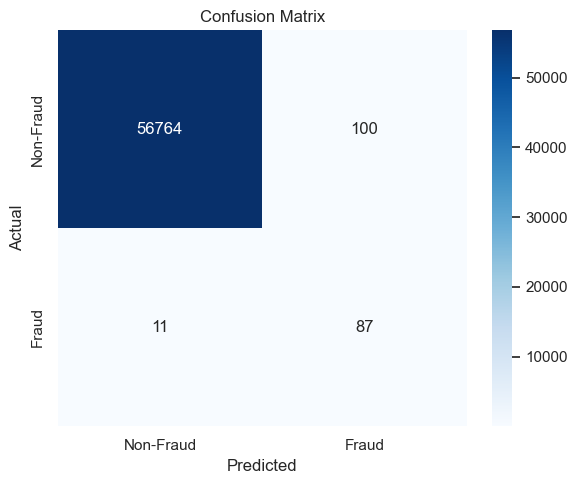

In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, make_scorer, f1_score, recall_score
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# Build XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

#  Perform 5-fold cross-validation to evaluate the F1 score, recall rate, and ROC-AUC.
f1_scorer = make_scorer(f1_score)
recall_scorer = make_scorer(recall_score)
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

cv_f1_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring=f1_scorer)
cv_recall_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring=recall_scorer)
cv_roc_auc_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring=roc_auc_scorer)

# Output cross-validation results
print("Cross-validated F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean(), "±", cv_f1_scores.std())
print("Cross-validated Recall scores:", cv_recall_scores)
print("Mean Recall score:", cv_recall_scores.mean(), "±", cv_recall_scores.std())
print("Cross-validated ROC-AUC scores:", cv_roc_auc_scores)
print("Mean ROC-AUC score:", cv_roc_auc_scores.mean(), "±", cv_roc_auc_scores.std())

# Train the final model and evaluate it on the test set.
xgb_model.fit(X_resampled, y_resampled)
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

# Output Test Set Performance
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Draw Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

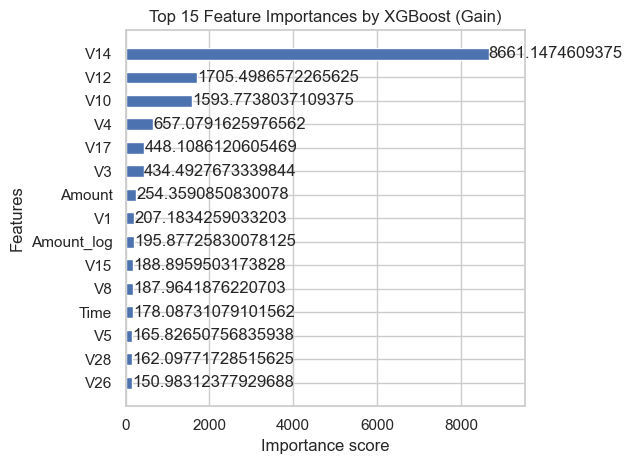

In [21]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=15, importance_type='gain', height=0.5)
plt.title("Top 15 Feature Importances by XGBoost (Gain)")
plt.tight_layout()
plt.show()

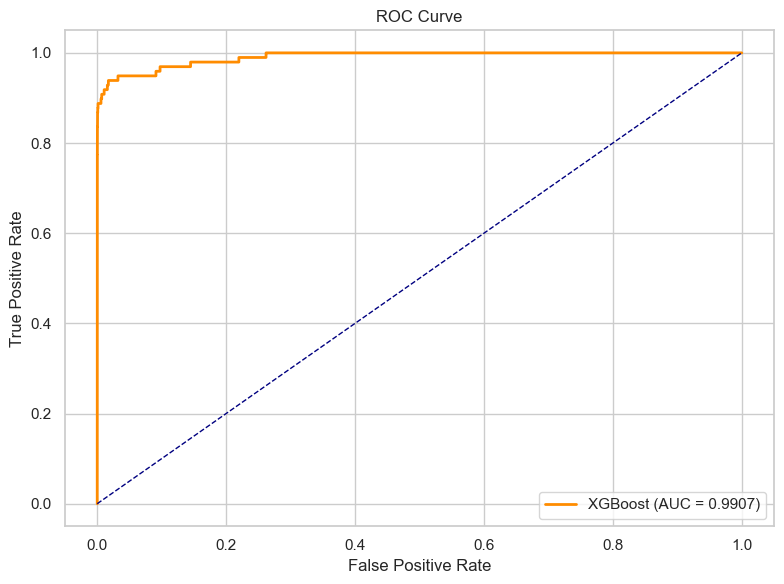

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

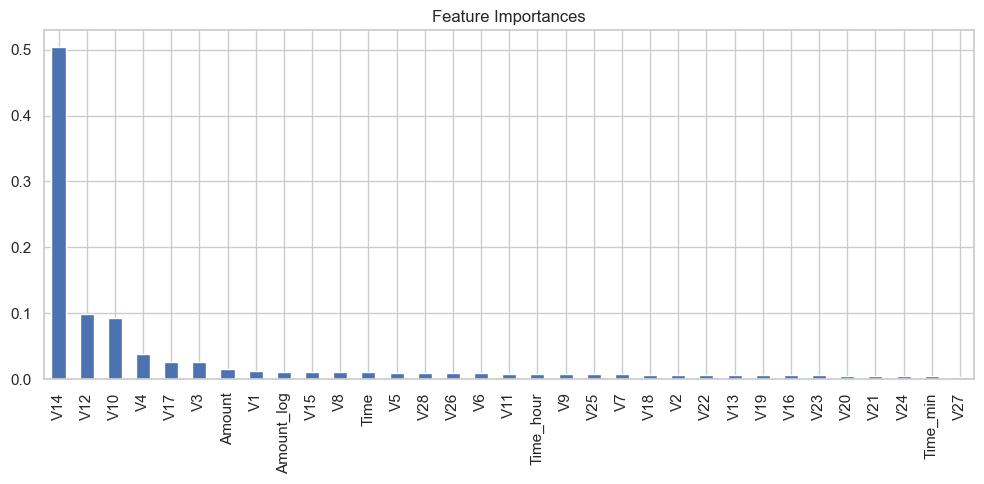

In [23]:
importances = xgb_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10, 5), title='Feature Importances')
plt.tight_layout()
plt.show()

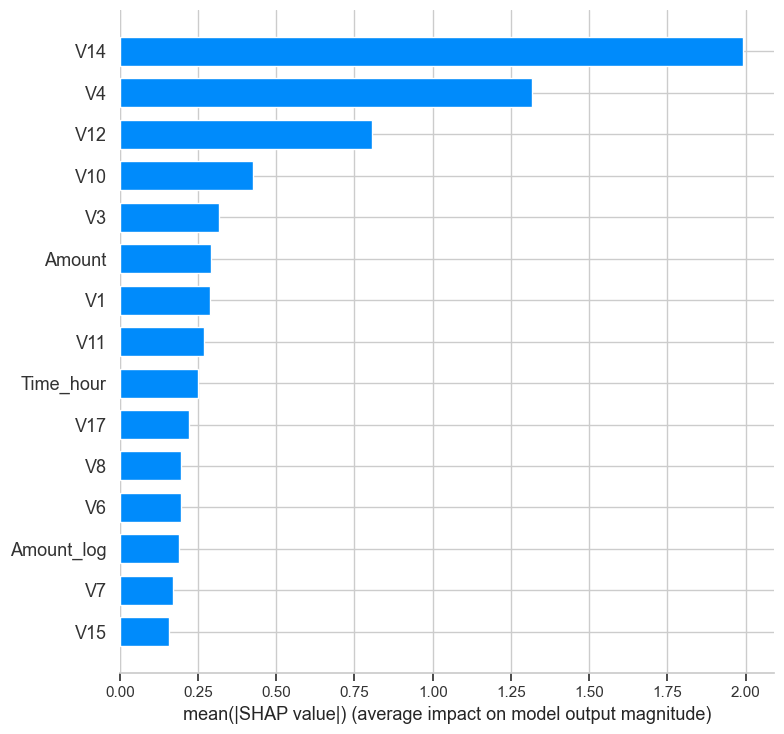

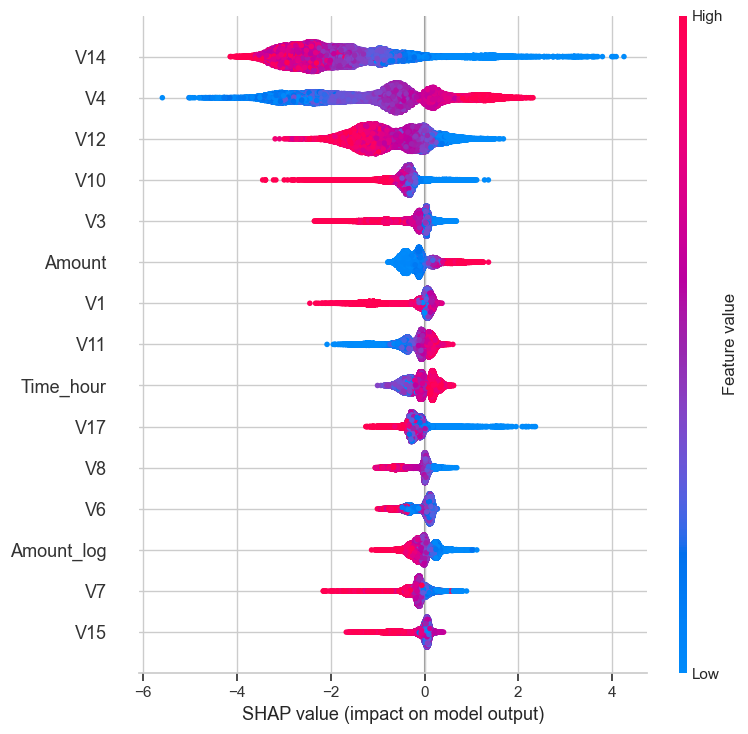

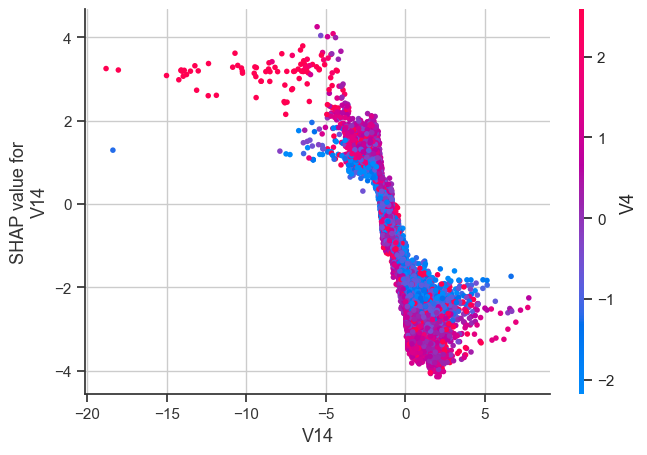

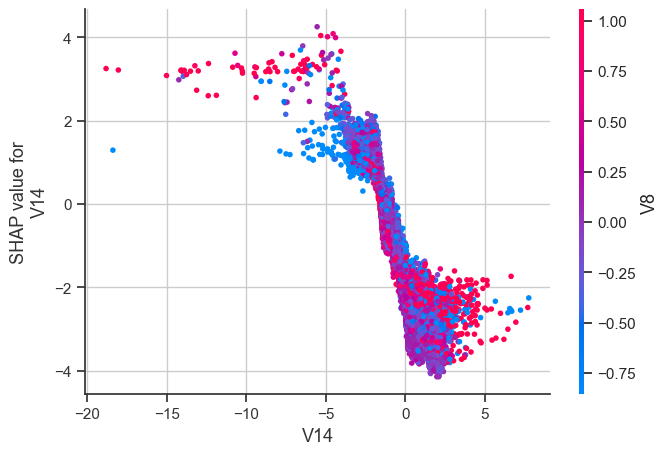

In [24]:
%matplotlib inline
import shap

#Build SHAP Explainer  Use TreeExplainer Directly
explainer = shap.TreeExplainer(xgb_model)

# 2. Calculate SHAP Value
shap_values = explainer.shap_values(X_test)

# 3. Global Feature Importance — The summary_plot displays the distribution of each feature's impact on the model output.
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15)

# 4. Feature Contribution Distribution — Beeswarm Plot Detailed examination of the SHAP value distribution for each sample across the top 15 features
shap.summary_plot(shap_values, X_test, max_display=15)
shap.dependence_plot("V14", shap_values, X_test)
#Strong Interaction Visualization: Demonstrating the interaction effect between two features
shap.dependence_plot("V14", shap_values, X_test, interaction_index="V8")


In [25]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. Hyperparameter Tuning - Using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_resampled, y_resampled)

print("Best params:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)

# Evaluate using the optimized best model
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.5).astype(int)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred, digits=4))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))


# 2. Error Analysis
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix:\nTN={tn}, FP={fp}, FN={fn}, TP={tp}")

# Load the test set results into a DataFrame
results = X_test.copy()
results['y_true'] = y_test.values
results['y_pred'] = y_pred
results['y_prob'] = y_prob

# Extract False Positives and False Negatives
false_positives = results[(results.y_true == 0) & (results.y_pred == 1)]
false_negatives = results[(results.y_true == 1) & (results.y_pred == 0)]

print(f"\nNumber of false positives: {len(false_positives)}")
print(f"Number of false negatives: {len(false_negatives)}")

# Review several misclassified sample characteristics
print("\nSample false positives:")
display(false_positives.head())

print("\nSample false negatives:")
display(false_negatives.head())


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best CV AUC: 0.9999945444767439

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9997     56864
           1     0.7961    0.8367    0.8159        98

    accuracy                         0.9994     56962
   macro avg     0.8979    0.9182    0.9078     56962
weighted avg     0.9994    0.9994    0.9994     56962

Test ROC-AUC: 0.9876947719155191

Confusion Matrix:
TN=56843, FP=21, FN=16, TP=82

Number of false positives: 21
Number of false negatives: 16

Sample false positives:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Time_min,Time_hour,Amount_log,y_true,y_pred,y_prob
9558,14324.0,-0.382982,2.692966,-1.790516,1.789234,0.905397,-1.316690,0.042522,-3.878924,1.275375,...,-0.491569,-0.056429,-0.172238,0.89,58,3,-0.105361,0,1,0.586407
19145,30047.0,-5.345558,5.116875,-9.270055,4.151766,-4.839258,-3.001705,-5.982505,3.892781,-2.587959,...,-0.277323,1.242472,0.281893,89.99,20,8,4.499810,0,1,0.861569
204601,135352.0,0.632714,-0.750150,-3.597306,2.084948,-0.491995,-0.908491,-0.269962,0.005952,-1.001418,...,-0.558564,0.199642,0.165116,468.07,35,13,6.148639,0,1,0.991983
152296,97235.0,0.973862,-0.806876,-3.063380,2.120865,0.884583,-0.553379,1.289002,-0.468092,0.896715,...,-0.639192,-0.112287,0.075201,529.00,0,3,6.271007,0,1,0.579265
460,339.0,0.503302,0.930065,-0.857525,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,...,-0.441323,0.460792,0.219985,2.00,5,0,0.698135,0,1,0.997541



Sample false negatives:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Time_min,Time_hour,Amount_log,y_true,y_pred,y_prob
249239,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,...,-1.125881,-0.170947,0.126221,1096.99,51,18,7.000334,1,0,0.000002
146790,87883.0,-1.360293,-0.458069,-0.700404,2.737229,-1.005106,2.891399,5.802537,-1.933197,-1.017717,...,-0.332115,-0.469800,-1.495006,829.41,24,0,6.720727,1,0,0.001272
124176,77202.0,-0.356326,1.435305,-0.813564,1.993117,2.055878,-0.543579,0.487691,0.085449,-0.536352,...,-0.155397,0.114328,0.101526,1.00,26,21,0.009950,1,0,0.317022
108258,70828.0,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,...,0.286281,0.135215,0.257315,0.76,40,19,-0.261365,1,0,0.000385
214775,139816.0,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,...,-0.200612,0.356856,0.032113,0.69,50,14,-0.356675,1,0,0.000032
